In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import math
from numpy import dot
from numpy.linalg import norm
from sklearn.preprocessing import MinMaxScaler

In [4]:
raw_data = [
  [
    '113082415690584490861', '25',        '/m/0403l3g',
    '/m/02ntfj',             '/m/025zzc', '/m/0bzvm2',
    '/m/028sqc',             '/m/04rlf',  '/m/064t9',
    '/m/01k8wb',             '/m/02vxn',  '/m/02jjt',
    '/m/01k8wb',             '/m/019_rr', '/m/028sqc',
    '/m/064t9',              '/m/04rlf',  '/m/01k8wb',
    '/m/07c1v',              '/m/019_rr', '/m/019_rr',
    '/g/120yrv6h',           '/m/019_rr', '/m/028sqc',
    '/m/04rlf',              '/m/04rlf',  '/m/028sqc',
    '/m/064t9',              '/m/04rlf',  '/m/064t9',
    '/m/028sqc',             '/m/019_rr', '/m/01k8wb',
    '/m/02vxn',              '/m/019_rr', '/m/02jjt',
    '/m/02jjt',              '/m/028sqc', '/m/04rlf',
    '/m/02vxn',              '/m/04rlf',  '/m/05rwpb',
    '/m/064t9',              '/m/028sqc', '/m/064t9',
    '/m/028sqc',             '/m/04rlf',  '/m/02jjt',
    '/m/019_rr',             '/m/02wbm',  '/m/019_rr',
    '/m/07c1v',              '/m/019_rr', '/m/01k8wb',
    '/m/07c1v',              '/m/01k8wb', '/m/019_rr',
    '/m/068hy',              '/m/019_rr', '/m/04rlf',
    '/m/028sqc',             '/m/064t9',  '/m/028sqc',
    '/m/064t9',              '/m/04rlf',  '/m/068hy',
    '/m/019_rr'
  ],
  [
    '115987064282754163674', '25',         '/m/02vxn',
    '/m/02jjt',              '/m/02ntfj',  '/m/025zzc',
    '/m/019_rr',             '/m/027x7n',  '/m/0403l3g',
    '/m/0bzvm2',             '/m/03hf_rm', '/m/025zzc',
    '/m/025zzc',             '/m/0bzvm2',  '/m/03hf_rm',
    '/m/0403l3g',            '/m/03hf_rm', '/m/0403l3g',
    '/m/025zzc',             '/m/02ntfj',  '/m/0bzvm2',
    '/m/04rlf',              '/m/028sqc',  '/m/05rwpb',
    '/m/06by7',              '/m/0glt670', '/m/02vxn',
    '/m/04rlf',              '/m/02jjt',   '/m/01k8wb',
    '/m/07c1v',              '/m/019_rr',  '/m/06ntj',
    '/m/02jjt',              '/m/019_rr',  '/m/01k8wb',
    '/m/07c1v',              '/m/0bzvm2',  '/m/0403l3g',
    '/m/03hf_rm',            '/m/025zzc',  '/m/02vxn',
    '/m/02jjt',              '/m/01k8wb',  '/m/098wr',
    '/m/02vxn',              '/m/02jjt',   '/m/019_rr',
    '/m/027x7n',             '/m/027x7n',  '/m/06ntj',
    '/m/019_rr',             '/m/01k8wb',  '/m/0bzvm2',
    '/m/0403l3g',            '/m/025zzc',  '/m/03hf_rm',
    '/m/02ntfj',             '/m/02jjt',   '/m/0f2f9',
    '/m/02vxn',              '/m/019_rr',  '/m/027x7n',
    '/m/0403l3g',            '/m/03hf_rm', '/m/025zzc',
    '/m/0bzvm2',             '/m/02jjt',   '/m/02vxn',
    '/m/025zzc',             '/m/03hf_rm', '/m/0bzvm2',
    '/m/0403l3g',            '/m/019_rr',  '/m/01k8wb',
    '/m/025zzc',             '/m/03hf_rm', '/m/0403l3g',
    '/m/0bzvm2',             '/m/02ntfj'
  ]
]

In [5]:
#raw_data

In [6]:
raw_data = [["104666000123509160000","14","/m/027x7n","/m/019_rr","/m/02wbm","/m/019_rr","/m/027x7n","/m/02wbm","/m/027x7n","/m/019_rr","/m/019_rr","/m/027x7n","/m/06ntj","/m/019_rr","/m/02vx4","/m/06ntj","/m/019_rr","/m/027x7n","/m/06ntj","/m/019_rr","/m/027x7n","/m/019_rr","/m/027x7n","/m/06ntj","/m/0f2f9","/m/02jjt","/m/027x7n","/m/019_rr","/m/027x7n","/m/019_rr","/m/027x7n","/m/019_rr","/m/02vx4","/m/06ntj"],["111931018210891240000","17","/m/028sqc","/m/064t9","/m/02jjt","/m/04rlf","/m/032tl","/m/019_rr","/m/04rlf","/m/064t9","/m/028sqc","/m/02jjt","/m/04rlf","/m/064t9","/m/028sqc","/m/019_rr","/m/019_rr","/m/019_rr","/m/028sqc","/m/064t9","/m/04rlf","/m/064t9","/m/028sqc","/m/04rlf","/m/02jjt","/m/019_rr","/m/028sqc","/m/04rlf","/m/02jjt","/m/064t9","/m/032tl","/m/019_rr","/m/02wbm","/m/019_rr","/m/019_rr","/m/032tl","/m/06ntj","/m/02jjt","/m/019_rr","/m/032tl","/m/019_rr","/m/032tl","/m/019_rr","/m/019_rr","/m/02jjt"],["113082415690584490000","25","/m/019_rr","/m/02ntfj","/m/025zzc","/m/0403l3g","/m/0bzvm2","/m/019_rr","/m/068hy","/m/02wbm","/m/019_rr","/m/019_rr","/m/01k8wb","/m/07c1v","/m/04rlf","/m/064t9","/m/028sqc","/m/02jjt","/m/01k8wb","/m/019_rr","/m/028sqc","/m/04rlf","/m/064t9","/m/02vxn","/m/02jjt","/m/02jjt","/m/02vxn","/m/064t9","/m/028sqc","/m/04rlf","/m/04rlf","/m/028sqc","/m/064t9","/m/04rlf","/m/028sqc","/m/064t9","/m/064t9","/m/04rlf","/m/028sqc","/m/019_rr","/m/04rlf","/m/064t9","/m/04rlf","/m/028sqc","/m/01k8wb","/m/07c1v","/m/019_rr","/m/064t9","/m/028sqc","/m/04rlf","/m/05rwpb","/m/02jjt","/m/04rlf","/m/028sqc","/m/019_rr","/g/120yrv6h","/m/028sqc","/m/064t9","/m/04rlf","/m/01k8wb","/m/019_rr","/m/01k8wb","/m/07c1v","/m/019_rr","/m/01k8wb","/m/019_rr","/m/07c1v"],["115987064282754170000","25","/m/025zzc","/m/0403l3g","/m/03hf_rm","/m/0bzvm2","/m/02vxn","/m/02jjt","/m/04rlf","/m/02jjt","/m/02vxn","/m/02ntfj","/m/0bzvm2","/m/03hf_rm","/m/025zzc","/m/0403l3g","/m/02ntfj","/m/0bzvm2","/m/03hf_rm","/m/025zzc","/m/0403l3g","/m/02jjt","/m/02vxn","/m/06ntj","/m/02jjt","/m/06by7","/m/04rlf","/m/028sqc","/m/05rwpb","/m/01k8wb","/m/027x7n","/m/019_rr","/m/019_rr","/m/02wbm","/m/02ntfj","/m/025zzc","/m/0403l3g","/m/03hf_rm","/m/0bzvm2","/m/019_rr","/m/06ntj","/m/027x7n","/m/07c1v","/m/01k8wb","/m/019_rr","/m/019_rr","/m/027x7n","/m/03hf_rm","/m/025zzc","/m/0bzvm2","/m/0403l3g","/m/0bzvm2","/m/0403l3g","/m/03hf_rm","/m/02ntfj","/m/025zzc","/m/0403l3g","/m/0bzvm2","/m/03hf_rm","/m/025zzc","/m/02jjt","/m/02vxn","/m/01k8wb","/m/07c1v","/m/019_rr","/m/01k8wb","/m/07c1v","/m/019_rr","/m/02vxn","/m/025zzc","/m/02jjt","/m/02ntfj","/m/07c1v","/m/019_rr","/m/01k8wb","/m/02jjt","/m/019_rr","/m/098wr","/m/02wbm","/m/025zzc","/m/02ntfj","/m/03hf_rm","/m/0bzvm2","/m/0403l3g"],["116104082866269160000","7","/m/06ntj","/m/01cgz","/m/019_rr","/m/07yv9","/m/019_rr","/m/04rlf","/m/028sqc","/m/05rwpb","/m/01k8wb","/m/098wr","/m/028sqc","/m/02jjt","/m/04rlf","/m/019_rr","/m/02wbm","/m/07c1v","/m/019_rr","/m/01k8wb","/m/01k8wb","/m/098wr"]]

In [7]:
raw_data

[['104666000123509160000',
  '14',
  '/m/027x7n',
  '/m/019_rr',
  '/m/02wbm',
  '/m/019_rr',
  '/m/027x7n',
  '/m/02wbm',
  '/m/027x7n',
  '/m/019_rr',
  '/m/019_rr',
  '/m/027x7n',
  '/m/06ntj',
  '/m/019_rr',
  '/m/02vx4',
  '/m/06ntj',
  '/m/019_rr',
  '/m/027x7n',
  '/m/06ntj',
  '/m/019_rr',
  '/m/027x7n',
  '/m/019_rr',
  '/m/027x7n',
  '/m/06ntj',
  '/m/0f2f9',
  '/m/02jjt',
  '/m/027x7n',
  '/m/019_rr',
  '/m/027x7n',
  '/m/019_rr',
  '/m/027x7n',
  '/m/019_rr',
  '/m/02vx4',
  '/m/06ntj'],
 ['111931018210891240000',
  '17',
  '/m/028sqc',
  '/m/064t9',
  '/m/02jjt',
  '/m/04rlf',
  '/m/032tl',
  '/m/019_rr',
  '/m/04rlf',
  '/m/064t9',
  '/m/028sqc',
  '/m/02jjt',
  '/m/04rlf',
  '/m/064t9',
  '/m/028sqc',
  '/m/019_rr',
  '/m/019_rr',
  '/m/019_rr',
  '/m/028sqc',
  '/m/064t9',
  '/m/04rlf',
  '/m/064t9',
  '/m/028sqc',
  '/m/04rlf',
  '/m/02jjt',
  '/m/019_rr',
  '/m/028sqc',
  '/m/04rlf',
  '/m/02jjt',
  '/m/064t9',
  '/m/032tl',
  '/m/019_rr',
  '/m/02wbm',
  '/m/019_rr',

In [8]:
# 데이터 전처리

class DataPreprocessing(object):
   
    def ListToArray(self, raw_data): 
        self.arr = np.array(raw_data)
        self.n_samples = self.arr.shape[0]
                                    
    def MakeColumns(self):
        self.user_id = []
        for i in range(self.arr.shape[0]):
            self.user_id.append(self.arr[i][0])
            
        self.channels = []
        for i in range(self.arr.shape[0]):
            self.channels.append(self.arr[i][1])
            
        self.cate = []
        for i in range(self.arr.shape[0]):
            self.cate.append(self.arr[i][2:])
    
    def TotalNumOfCategory(self): # 각 이용자의 구독한 채널에 대한 총 카테고리 개수 추출 (구독 채널 수 아님)
        self.num_category = []
        for i in range(self.arr.shape[0]):
            count = 0
            for j in self.cate[i][:]:
                count += 1
            self.num_category.append(count)
            
    def MinMaxScaling(self): # 구독 채널 수 feature MinMaxScaling
        scaler = MinMaxScaler()
        self.channels_scaled = scaler.fit_transform(np.array(self.channels).reshape(-1,1))
        self.channels_scaled = self.channels_scaled.reshape(-1)
        
    def ArrayToDataframe(self):
        self.raw_df = pd.DataFrame({'Channels': self.channels_scaled, 'Category': self.cate}, index=self.user_id)
    
    def Extraction(self):
        self.category = []
        
        for i in range(self.raw_df['Category'].shape[0]):
            np.array(pd.DataFrame(self.raw_df['Category'][i]).value_counts()).reshape(1,-1)
            
            self.category_series = pd.DataFrame(self.raw_df['Category'][i]).value_counts()
            
            self.df_category = pd.DataFrame(np.array(self.category_series).reshape(1, -1), 
                               columns = [j for j in self.category_series.index])

            self.category.append(self.df_category.sort_values(by=0, axis=1).iloc[0, -2:].index.tolist())
            
        self.first_category = pd.DataFrame(self.category)[0].str[0]
        self.second_category = pd.DataFrame(self.category)[1].str[0]
        
    def EachCategoryToFeature(self): # 고유한 카테고리 추출 (column별로 추출하기 때문에 중복이 있을 수 있음)
        self.cate_df = pd.DataFrame(self.category)
        self.two_cate_list = []
        for i in range(2):
            for cate in self.cate_df[i].unique():
                self.two_cate_list.append(cate)
                
        
    def NumOfCategory(self): # 각 이용자의 선호하는 2개의 카테고리의 개수 추출
        self.weight_cate = []
        for i in range(self.arr.shape[0]): # row
            for j in range(2): # col
                count = 0
                for cate in self.cate[i]: 
                    if cate == self.category[i][j][0]:
                        count += 1
                self.weight_cate.append(count)
        self.weight_cate = np.array(self.weight_cate).reshape(self.n_samples, -1)
    
    def ToDf(self):
        self.df = pd.DataFrame(columns=pd.DataFrame(self.two_cate_list)[0].unique(), index=self.user_id)
        self.df['channels'] = self.channels_scaled
        #self.df['channels'] = self.channels
        self.df.fillna(0, inplace=True) # NaN 값 0으로 변경
        self.df = self.df.astype('float')
    
    def PutWeightIntoCols(self): # 각 이용자의 선호하는 두 개의 카테고리에 대한 가중치(해당 카테고리 구독 개수 / 전체 구독 카테고리 개수)를 알맞은 자리에 입력
        for row in range(self.weight_cate.shape[0]):
            self.dic = {}
            for col in range(self.weight_cate.shape[1]):
                self.dic[self.category[row][col][0]] = self.weight_cate[row][col]
            for key in self.dic.keys():
                for col in self.df.columns:
                    if (key == col):
                        self.df[col][row] = self.dic[key] / self.num_category[row] # 해당 카테고리 구독 개수 / 전체 구독 카테고리 개수
        
        return self.df

In [9]:
dt = DataPreprocessing()

In [10]:
dt.ListToArray(raw_data)

/var/folders/0t/m5tmk07x1jn8mbwk5mpr748h0000gp/T/ipykernel_92710/492440258.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.arr = np.array(raw_data)


In [11]:
dt.MakeColumns()
print(dt.user_id, dt.channels)

['104666000123509160000', '111931018210891240000', '113082415690584490000', '115987064282754170000', '116104082866269160000'] ['14', '17', '25', '25', '7']


In [12]:
dt.TotalNumOfCategory()

In [13]:
dt.MinMaxScaling()

In [14]:
dt.ArrayToDataframe()

In [15]:
dt.Extraction()
dt.category

[[('/m/027x7n',), ('/m/019_rr',)],
 [('/m/064t9',), ('/m/019_rr',)],
 [('/m/019_rr',), ('/m/04rlf',)],
 [('/m/025zzc',), ('/m/019_rr',)],
 [('/m/01k8wb',), ('/m/019_rr',)]]

In [16]:
dt.EachCategoryToFeature()
dt.two_cate_list

[('/m/027x7n',),
 ('/m/064t9',),
 ('/m/019_rr',),
 ('/m/025zzc',),
 ('/m/01k8wb',),
 ('/m/019_rr',),
 ('/m/04rlf',)]

In [17]:
dt.NumOfCategory()
dt.weight_cate

array([[10, 11],
       [ 6, 12],
       [11, 11],
       [ 9,  9],
       [ 3,  4]])

In [18]:
# 가장 많이 구독한 채널의 카테고리와 두번째로 많이 구독한 채널의 카테고리를 각각 feature로 할당

dt.ToDf()

In [19]:
df = dt.PutWeightIntoCols()
df

,/m/027x7n,/m/064t9,/m/019_rr,/m/025zzc,/m/01k8wb,/m/04rlf,channels
104666000123509160000,0.3125,0.000000,0.343750,0.000000,0.00,0.000000,0.388889
111931018210891240000,0.0000,0.139535,0.279070,0.000000,0.00,0.000000,0.555556
113082415690584490000,0.0000,0.000000,0.169231,0.000000,0.00,0.169231,1.000000
115987064282754170000,0.0000,0.000000,0.109756,0.109756,0.00,0.000000,1.000000
116104082866269160000,0.0000,0.000000,0.200000,0.000000,0.15,0.000000,0.000000


In [20]:
# 주성분분석을 통해 2차원으로 특성의 차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_pca = pca.fit_transform(df)
features_pca

array([[ 0.23429406,  0.25578062],
       [ 0.03512103, -0.02634125],
       [-0.42805691, -0.02507672],
       [-0.4255668 , -0.04917272],
       [ 0.58420862, -0.15518992]])

In [21]:
# 2차원으로 축소한 특성에 대한 df 생성

df_pca = pd.DataFrame(features_pca, columns=['pca_x', 'pca_y'])
df_pca

,pca_x,pca_y
0,0.234294,0.255781
1,0.035121,-0.026341
2,-0.428057,-0.025077
3,-0.425567,-0.049173
4,0.584209,-0.155190


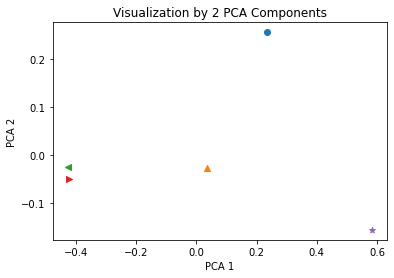

In [22]:
# 각 데이터 포인트 시각화

import matplotlib.pyplot as plt

marker = ['o', '^', '<', '>', '*']
for i in range(5):
    plt.scatter(x=df_pca.loc[i,'pca_x'], y=df_pca.loc[i,'pca_y'], marker=marker[i])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualization by 2 PCA Components')
plt.show()

# 코사인 유사도 기준으로 데이터 포인터 간의 유사성을 측정하기 때문에 시각화 결과의 직접적인 거리와 유사성 간에는 상관성이 낮음(혹은 없음)

In [23]:
# sklearn의 cosine_similarity 사용
# 코사인 유사도 계산 시 시간복잡도 문제 해결

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

class Classification(object):
    
    def __init__(self, df_data):
        self.df = df_data
        self.n_samples = self.df.shape[0]
    
    def Ohe(self, df): # 각 샘플에 대해 추출한 가장 선호하는 2개의 특성에 대해 원핫인코딩
        ohe = OneHotEncoder(sparse=False)
        self.train_feature = ohe.fit_transform(np.array(df[['first_category', 'second_category']]).reshape(-1,1))
    """
    def makeData(self, channels):
        channels = np.array(channels).reshape(self.n_samples, -1)
        self.X_train = np.hstack((channels, np.array(self.train_feature).reshape(self.n_samples, -1)))
    """
    def makeData(self):
        self.X_train = np.array(self.df)
        
    def Kmeans(self): # k_means 클러스터링
        model = KMeans(n_clusters=2)
        model.fit(self.X_train)
        return np.array(model.predict(self.X_train))
    
    def ReturnResult_cosine_similarity(self, k=2):
        k_users_dict = {}
        self.distance = []
        for i in range(0, self.X_train.shape[0]):
            distance = [cosine_similarity(self.X_train[i].reshape(1,-1), self.X_train)]
            self.distance.append(distance)
            # i 번째 데이터 포인터와 다른 데이터들 사이의 거리를 작은순으로 정렬한 후 해당 인덱스를 이용해서 가장 가까운 k명의 이용자 선별
            self.distance_idx = np.array(distance).ravel().argsort()

            google_id = []
            for j in range(0, k):
                google_id.append(self.df.index[self.distance_idx[j]])
            k_users_dict[self.df.index[i]] = google_id
        
        return k_users_dict

In [24]:
cl = Classification(df)

In [25]:
"""
cl.Ohe(df)
cl.train_feature
"""

'\ncl.Ohe(df)\ncl.train_feature\n'

In [26]:
cl.makeData()
cl.X_train

array([[0.3125    , 0.        , 0.34375   , 0.        , 0.        ,
        0.        , 0.38888889],
       [0.        , 0.13953488, 0.27906977, 0.        , 0.        ,
        0.        , 0.55555556],
       [0.        , 0.        , 0.16923077, 0.        , 0.        ,
        0.16923077, 1.        ],
       [0.        , 0.        , 0.1097561 , 0.1097561 , 0.        ,
        0.        , 1.        ],
       [0.        , 0.        , 0.2       , 0.        , 0.15      ,
        0.        , 0.        ]])

In [27]:
#result = cl.Kmeans()
#result

In [28]:
k_users = cl.ReturnResult_cosine_similarity(2)

In [29]:
k_users

{'104666000123509160000': ['116104082866269160000', '115987064282754170000'],
 '111931018210891240000': ['116104082866269160000', '104666000123509160000'],
 '113082415690584490000': ['116104082866269160000', '104666000123509160000'],
 '115987064282754170000': ['116104082866269160000', '104666000123509160000'],
 '116104082866269160000': ['115987064282754170000', '113082415690584490000']}

In [30]:
cl.distance

[[array([[1.        , 0.80816872, 0.71764159, 0.69583065, 0.45390733]])],
 [array([[0.80816872, 1.        , 0.9200417 , 0.90908917, 0.35038386]])],
 [array([[0.71764159, 0.9200417 , 1.        , 0.97887752, 0.13166632]])],
 [array([[0.69583065, 0.90908917, 0.97887752, 1.        , 0.08676588]])],
 [array([[0.45390733, 0.35038386, 0.13166632, 0.08676588, 1.        ]])]]